## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [79]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [80]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

## Loading the dataset

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_csv('/content/drive/MyDrive/Python Course/Loan_Modelling.csv')

In [83]:
# creating a copy of the data
data = df.copy()

## Data Overview

* Observations
* Sanity checks



*   Viewing the first and last 5 rows of the dataset




In [84]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [85]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [86]:
#shape of the data
data.shape

(5000, 14)



*   Data has 5,000 Rows and 14 Columns






*   Checking Attribute types





In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB



*  There are 8 Numerical and 6 categorical columns in the data.
*  There are 6 categorical variables Education, Personal Loan,Secirties Account , CD Account , Online , and Credit Card  are encoded by default.



In [88]:
data.describe()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



*   The average age of applicants is 45years.
*  On average, Applicants earn 74k dollars annually, with 25% earning more than $40k annually

*  On average familes sizes are of 2

In [89]:
data['Experience'].describe()
print("Number of negative values in Experience:", (data['Experience'] < 0).sum())

Number of negative values in Experience: 52


In [90]:
data[data['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


will take the absolute value of the values that way I do not loose data .

In [91]:
data['Experience'] = data['Experience'].apply(lambda x: abs(x) if x < 0 else x)

# Double-check if any negatives remain
print("Negative Experience values after fix:", (data['Experience'] < 0).sum())

Negative Experience values after fix: 0


In [92]:
# Check again to confirm fix
print("Negative Experience values after fix:", (data['Experience'] < 0).sum())

# the new minimum value in Experience column
print("Minimum Experience value after fix:", data['Experience'].min())


Negative Experience values after fix: 0
Minimum Experience value after fix: 0


In [93]:
# checking for null values
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0





*    There are no missing values in the data








In [94]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)



*   There are no duplicates in the data




                            ZIP

I tested whether customers ZIP codes provided useful information for predicting personal loan acceptance. Instead of using the full 5-digit ZIP .

I grouped them into broader “ZIP2” categories using the first two digits. This reduced thousands of ZIPs into about 100 postal regions.



In [95]:
# Created a two-digit ZIP code grouping
#Convert the orgininal ZipCode column to a string and take only first two digits
df['ZIP2'] = df['ZIPCode'].astype(str).str[:2]          # keeping as string category for grouping

#Also made a numeric version so it can be used in correlation calculations
df['ZIP2_int'] = df['ZIP2'].astype(int)


#This measures how strongly ZIP2 is linearly related to loan acceptance.
zip2_corr = df[['ZIP2_int', 'Personal_Loan']].corr().loc['ZIP2_int', 'Personal_Loan']
print(f"Correlation (ZIP2 vs Personal_Loan): {zip2_corr:.4f}")

# Target rate by ZIP2 (mean of Personal_Loan per ZIP2)
#Group the data by ZIP2 STRING VERSION
#Compute the mean of Personal loan for each group
#This gives the loan acceptance rate per ZIP2 region
#Sort results to see the ZIP2 groups with the highest and lowest acceptance rates
zip2_rates = (
    df.groupby('ZIP2', as_index=False)['Personal_Loan']
      .mean()
      .rename(columns={'Personal_Loan': 'loan_rate'})
      .sort_values('loan_rate', ascending=False)
)

print("\nTop ZIP2 groups by loan rate:")
display(zip2_rates.head(10))

print("\nBottom ZIP2 groups by loan rate:")
display(zip2_rates.tail(10))

Correlation (ZIP2 vs Personal_Loan): -0.0006

Top ZIP2 groups by loan rate:


,ZIP2,loan_rate
3,93,0.103118
5,95,0.098160
1,91,0.097345
0,90,0.095306
2,92,0.095142
4,94,0.093750
6,96,0.075000



Bottom ZIP2 groups by loan rate:


,ZIP2,loan_rate
3,93,0.103118
5,95,0.098160
1,91,0.097345
0,90,0.095306
2,92,0.095142
4,94,0.093750
6,96,0.075000


* The correlation between ZIP2 and Personal Loan is nearly zero -0.0006, confirming that ZIP2 does not meaningfully impact loan acceptance and should not be included as a predictive featur

The Top Zip2 groups show only slightly higher loan acceptance rates than average while the bottom groups show slighly lower rates . .

Because ZIP2 added **no predictive value**, and keeping it would add unnecessary complexity,** I dropped it from the final model**

I Ploted a bar chart of these rates to visually check if any ZIP2 group has unusually high or low loan acceptance.

Bar shows that the average loan acceptence rate for the top zip2 groups

While there are some small differences between groups none of the regions show a strong or consisten seperation . Most two number zips group have loan rates clustered around the overall average , with no clear tren that certain regions are more significaltly more or less likely to accept the loan.


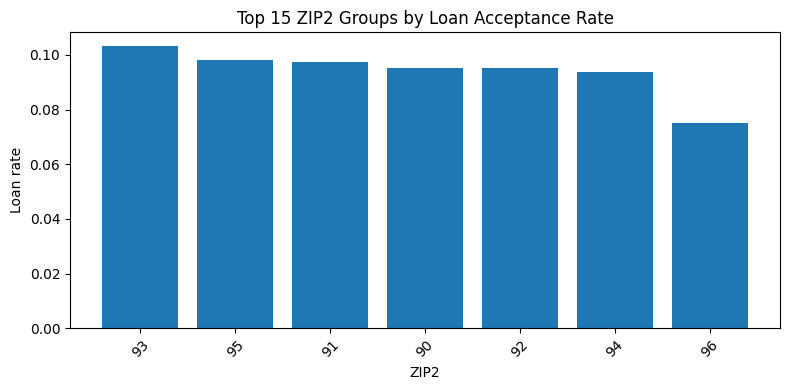

In [96]:
top15 = zip2_rates.head(15)
plt.figure(figsize=(8,4))
plt.bar(top15['ZIP2'], top15['loan_rate'])
plt.title("Top 15 ZIP2 Groups by Loan Acceptance Rate")
plt.xlabel("ZIP2")
plt.ylabel("Loan rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

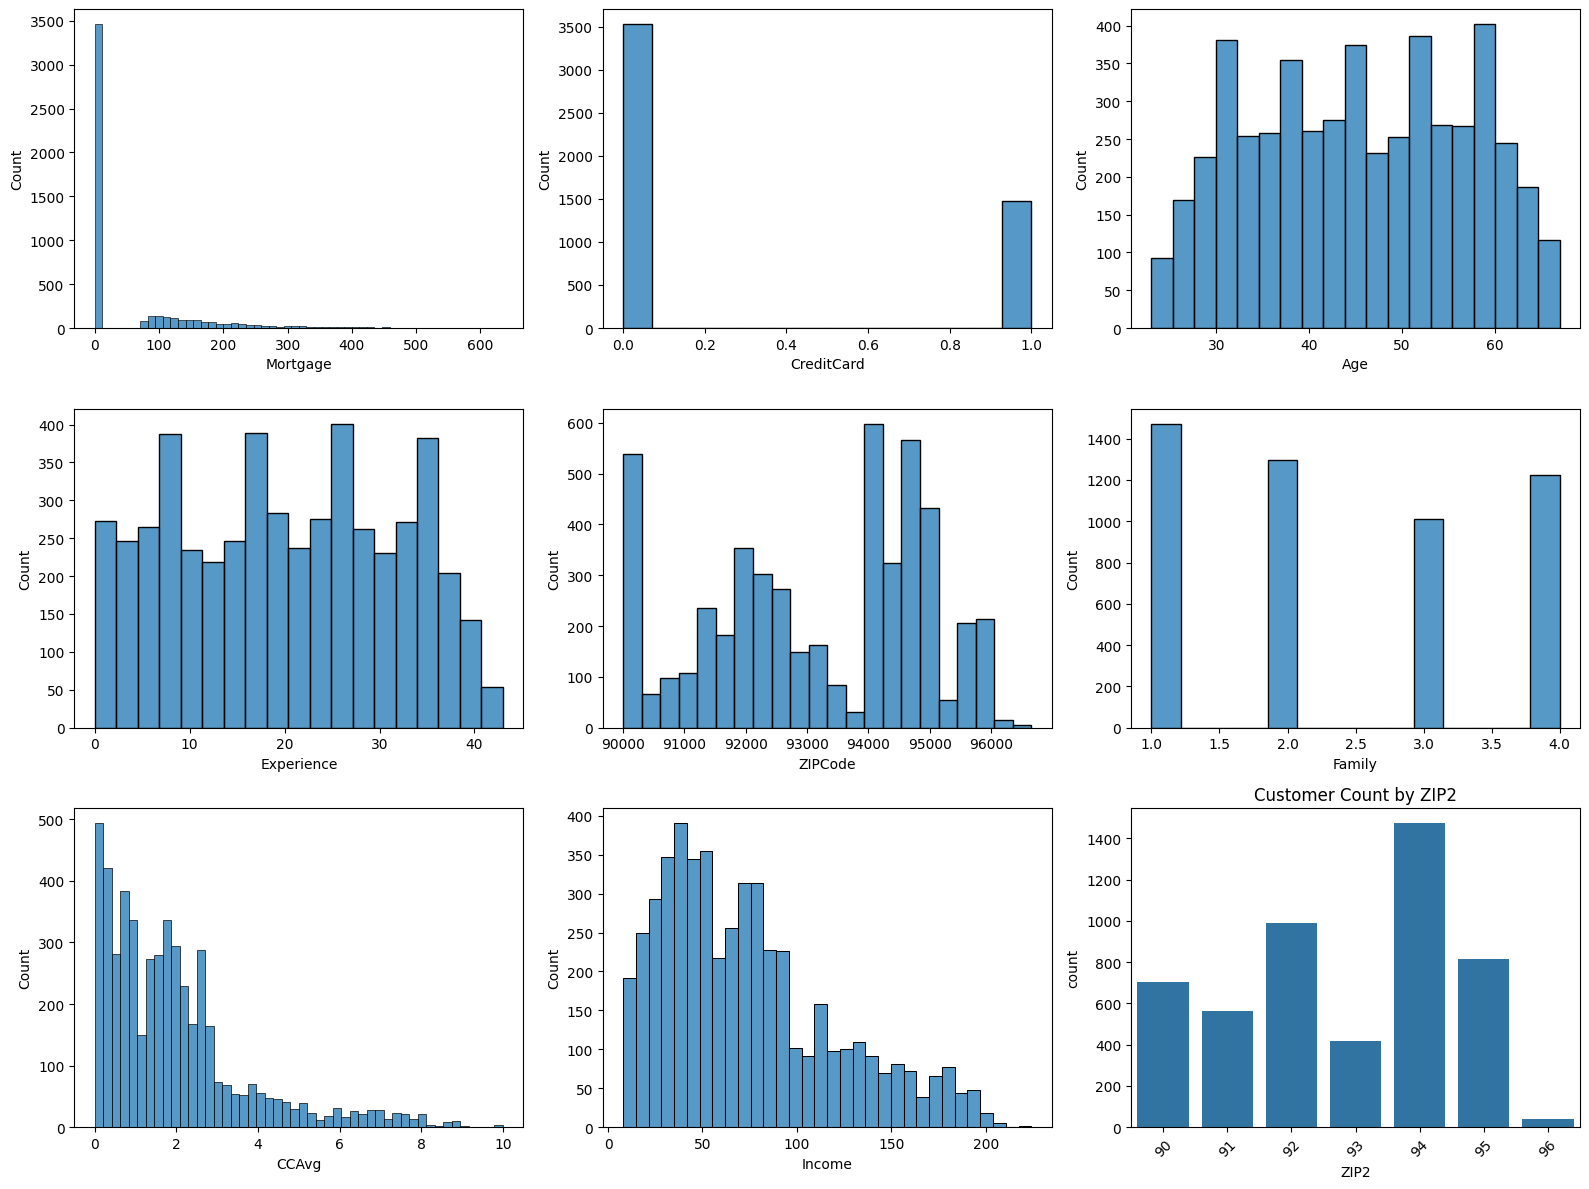

In [97]:
#  the figure size
plt.figure(figsize=(16, 12))

# the list of numerical features to plot
num_features = [ 'Mortgage', 'CreditCard','Age','Experience','ZIPCode','Family','CCAvg','Income']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # add spacing between plots

# add a separate subplot for ZIP2 counts
data['ZIP2'] = data['ZIPCode'].astype(str).str[:2]  # create ZIP2 if not already present
plt.subplot(3, 3, len(num_features)+1)
sns.countplot(data=data, x='ZIP2', order=sorted(data['ZIP2'].unique()))
plt.title("Customer Count by ZIP2")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Questions
1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
* **The distribution of Mortgage is righ skewed Most customers have low or no mortage while a small number of customer have large mortage values.**
* **The box plot also confirms that there are many outliers : these represent customers with mortages much higher than the majority**
* **This suggest that although most customers have little no mortage , there are few customers with really high mortage putting the distribution tail to the right**


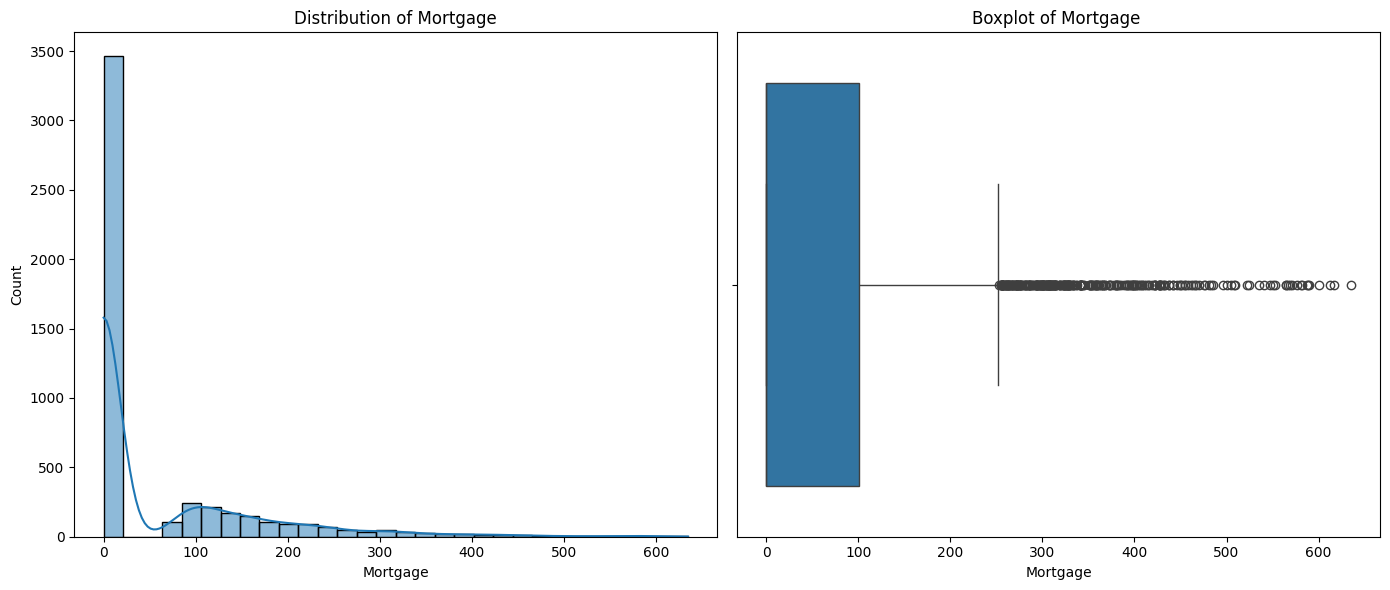

In [98]:
plt.figure(figsize=(14,6))

# building a histplot to see only Mortage distribution
plt.subplot(1,2,1)
sns.histplot(data['Mortgage'], bins=30, kde=True)
plt.title("Distribution of Mortgage")
plt.xlabel("Mortgage")
plt.ylabel("Count")

# Boxplot to check for Mortage outliers
plt.subplot(1,2,2)
sns.boxplot(x=data['Mortgage'])
plt.title("Boxplot of Mortgage ")
plt.xlabel("Mortgage")


plt.tight_layout()
plt.show()

In [99]:
#Adding some counts on the Credit Card Column to see the exact credit cards
credit_counts = data['CreditCard'].value_counts()
print(credit_counts)


CreditCard
0    3530
1    1470
Name: count, dtype: int64



Questions

2.  How many customers have credit cards?  
**There are about 1470 Customers with Credit Cards, but there are more customers with No Credit Card.**


Questions
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

*   **Income** has about 0.5 correlation with Personal Loan . This is a moderately strong postive relationship .
This means that higher income customers are more likeley to take a personal loan

* **CCAvg** 'CREDIT CARD SPENING' strong postive correlation of about 0.37
Higher montly card speing is also linked to loan acceptence


*  Customers with high income are more likely to accept a personal loan
**Age** has around 0.0 which indicates that correlation with personal loan has no linear relationshihp between customers age and there likelhood to take a loan out.

* **Experience** also show correlations close to zero indicating they probably have little impact on predicting a loan acceptance



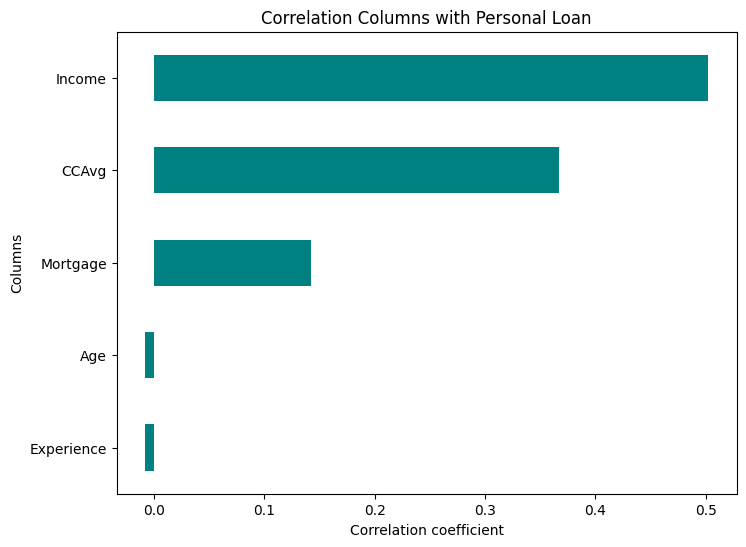

In [100]:
#I gathered my continuouse variables first to form linear relationships to see increase  or decrease in them
num_columns = ['Mortgage', 'Age',  'Income','CCAvg','Experience']
corr = data[num_columns + ['Personal_Loan']].corr()

# Correlation with personal loan column "target variable"
corr_target = corr['Personal_Loan'].drop('Personal_Loan').sort_values()

# Plot bar chart
plt.figure(figsize=(8,6))
corr_target.plot(kind='barh', color='teal')
plt.title("Correlation Columns with Personal Loan")
plt.xlabel("Correlation coefficient")
plt.ylabel("Columns")
plt.show()

#Questions
4.How does a customer's interest in purchasing a loan vary with their age?.

**The Graph shows that loan acceptance does not vary significantly accross age groups. For example : The age 60-70s age group has the highest approval rate at about 10.8% but so does the 20-30 age group at about sligh less of 10.5% . Middle age groups of 30-60s show slight lower rates , around 10% overall the variation by age is minimial that age is not a strong driver of loan acceptance compared to other factors like income and credit card spening**


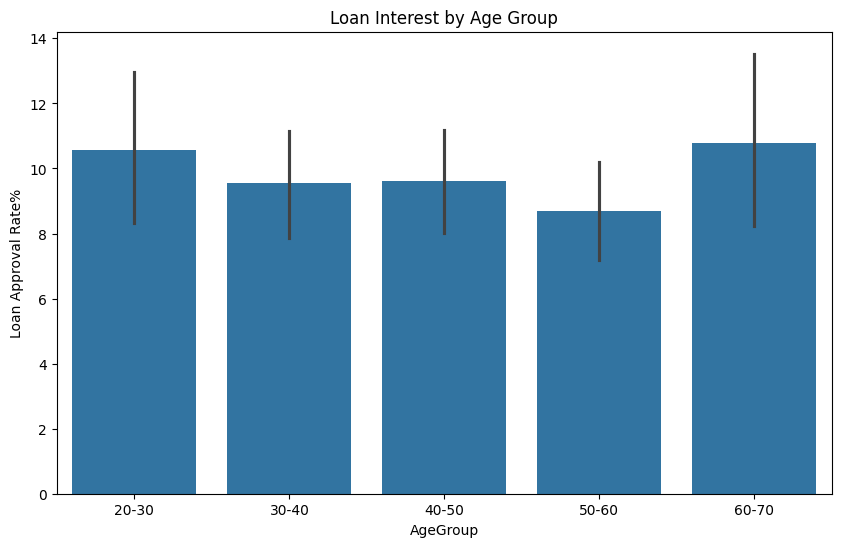

In [102]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[20,30,40,50,60,70], labels=['20-30','30-40','40-50','50-60','60-70'])

plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='Personal_Loan', data=data, estimator=lambda x: 100*sum(x)/len(x))
plt.ylabel("Loan Approval Rate%")
plt.title("Loan Interest by Age Group")
plt.show()

In [103]:
#Took the average and percentage of each bucket so I can view which age group gets personal loans better
age_loan = data.groupby('AgeGroup')['Personal_Loan'].mean() * 100
print(age_loan)

AgeGroup
20-30    10.576923
30-40     9.546926
40-50     9.606299
50-60     8.692366
60-70    10.786106
Name: Personal_Loan, dtype: float64


/tmp/ipython-input-953221465.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_loan = data.groupby('AgeGroup')['Personal_Loan'].mean() * 100


Questions

5. How does a customer's interest in purchasing a loan vary with their education?

* **Professional educated customers have high loan interest at 13.7% and Graduate educated have 13.0% while undergad have significanly less intrest at around 4%**

* **This suggests that education level is positively associated with loan acceptance, with more highly educated customers being more open to taking loans.**


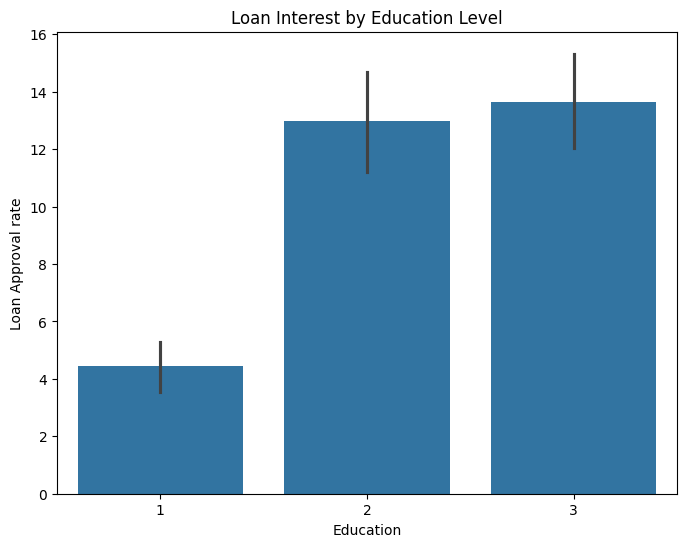

In [104]:
plt.figure(figsize=(8,6))
sns.barplot(x='Education', y='Personal_Loan', data=data, estimator=lambda x: 100*sum(x)/len(x))
plt.ylabel("Loan Approval rate")
plt.title("Loan Interest by Education Level")
plt.show()

In [105]:
#getting the loan percent by grouping education and personal loan and calcuating mean
edu_loan = data.groupby('Education')['Personal_Loan'].mean() * 100
print(edu_loan)



Education
1     4.437023
2    12.972202
3    13.657562
Name: Personal_Loan, dtype: float64


Addtional Plots for me

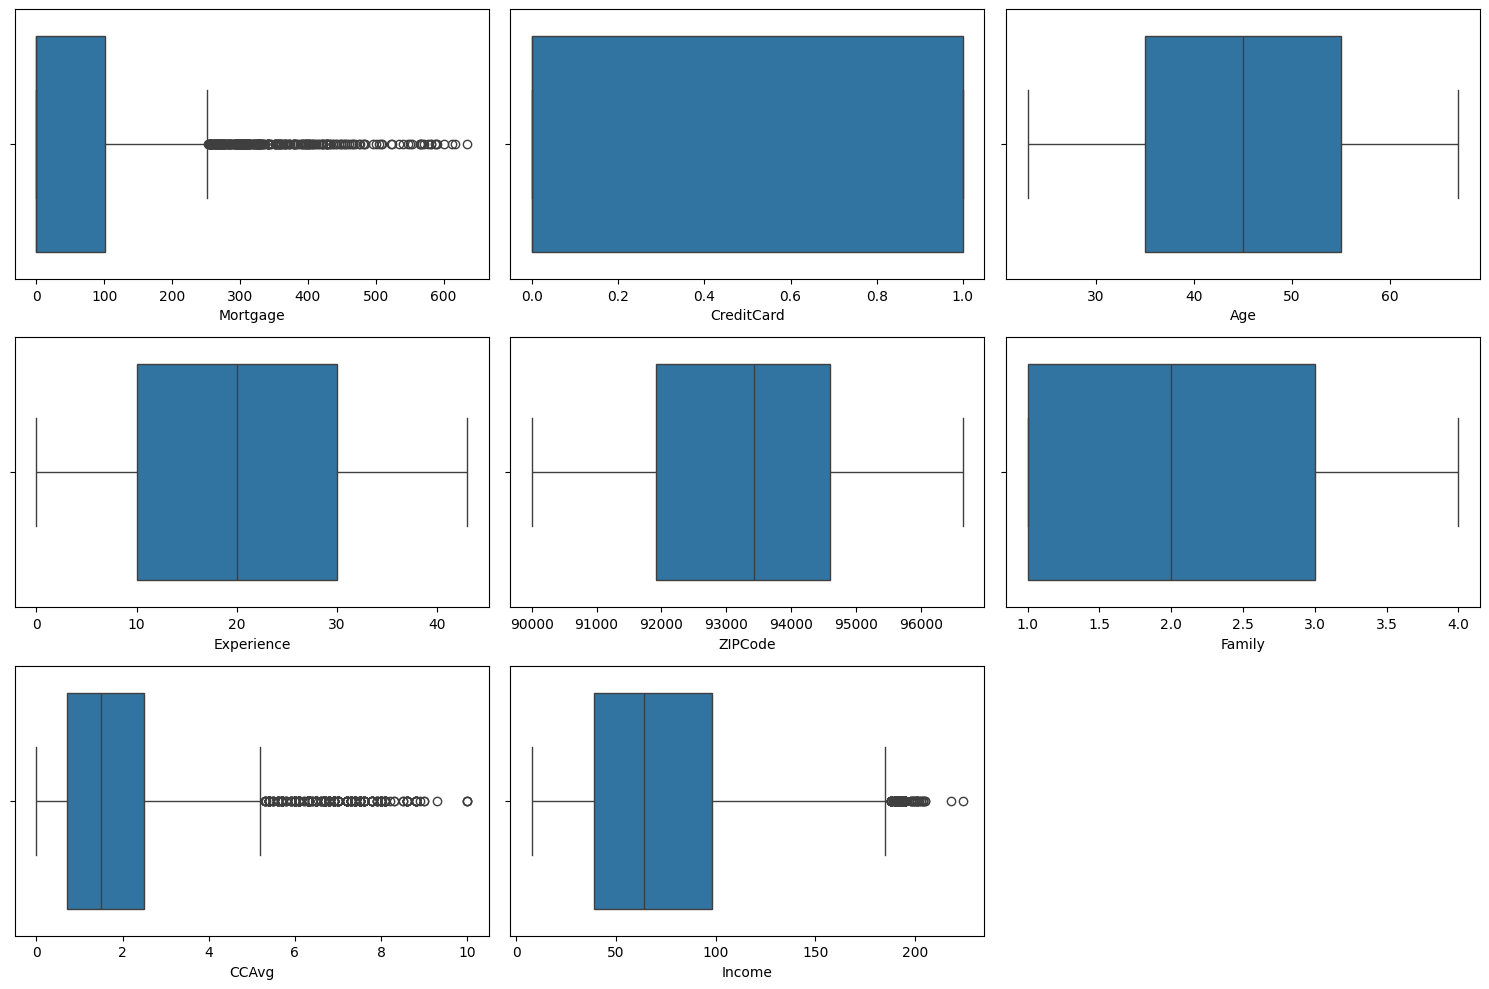

In [106]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots


*  Mortgage: Highly right-skewed with a lot  outliers at large values like in the histogram. Most customers have low or no mortgage.

* Income Shows a wider spread with clear outliers at the higher end indicating a small group of very high earners compared to the majority of the data .

* CCAvg Credit Card Spending :  Contains several outliers with unusually high spending. Most customers spend some mid amounts, but a few have very high monthly expenditures.

* Age and Experience : Distributions are fairly compact with few visible outliers this is  reflecting the general working age population.

* Family :  Displays a discrete distribution since it represents family size. Outliers are not as meaningful here because values are naturally limited.

* CreditCard : Only two values 0 or 1, so the boxplot does not add much insight.


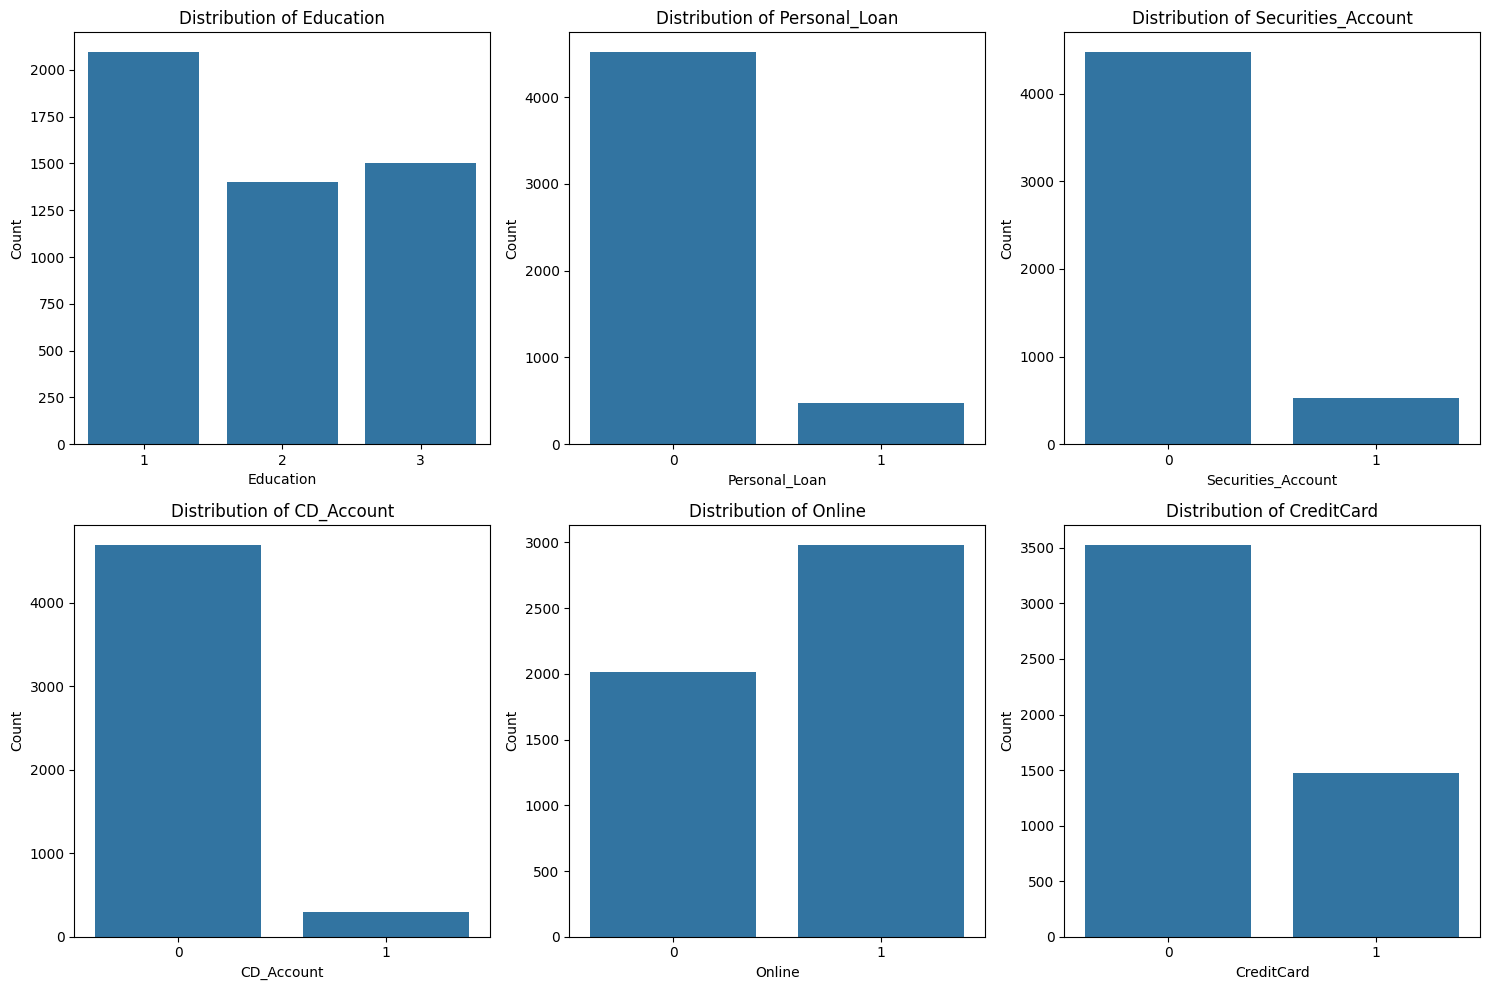

In [107]:
#creating a list with categorical columns

categorical_cols = ['Education', 'Personal_Loan', 'Securities_Account',
                    'CD_Account', 'Online', 'CreditCard']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes for easy iteration because its there are alot of graphs
axes = axes.flatten()

# Loop through categorical columns and plot

for i, col in enumerate(categorical_cols):


    #Print the count plot
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# removed unened axex

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

* Education The majority of customers are Undergraduates, followed by Graduates, with the smallest group being Professional/Advanced degree holders. This uneven distribution suggests that most of the bank customer base is less formally educated.

* Personal Loan The target variable is highly imbalanced. Most customers did not accept the loan, while only a small minority did.

* SecuritiesAccount : Most customers do not have a securities account. Only a small fraction hold one, making this attribute relatively rare.

* CD_Account  Similar to securities, the vast majority of customers do not have a certificate of deposit CD account.

* Online : A very large portion of customers use online banking, with only a small minority not using it.

* CreditCard : The distribution is more balanced compared to other columns/attributes, but still skewed a larger group of customers do not use a credit card issued by another bank, while a substantial portion do

I want to see the proprtions in each categorical column to the data iteself

In [108]:
#put all my categorical columns in a variable categorical_cols
categorical_cols = ['Education', 'Personal_Loan', 'Securities_Account',
                    'CD_Account', 'Online', 'CreditCard']
#iterate thru the list and call the index in order to count thru each category of yes no or numbers.
for i, col in enumerate(categorical_cols):
# checking the distribution of the categories in all my columns
    print(f"--- Analysis for {col} ---")
    print(100 * data[col].value_counts(normalize=True), "\n")

--- Analysis for Education ---
Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64 

--- Analysis for Personal_Loan ---
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

--- Analysis for Securities_Account ---
Securities_Account
0    89.56
1    10.44
Name: proportion, dtype: float64 

--- Analysis for CD_Account ---
CD_Account
0    93.96
1     6.04
Name: proportion, dtype: float64 

--- Analysis for Online ---
Online
1    59.68
0    40.32
Name: proportion, dtype: float64 

--- Analysis for CreditCard ---
CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64 





*  CD_Account: There are 93.96% records with **No** CD Accounts
*   Education Level : There is 41% of clients who have at a **Undergraduate education**


*   Personal Loan : 90.4% with **No** Personal Loan
*   Security Account : 89.56% with **No** Security Account


*   Online : 59.68% **Yes** customers go Online than in person
*   Credit Card :70.6% customers have **No** credit card than customers with credit hard.






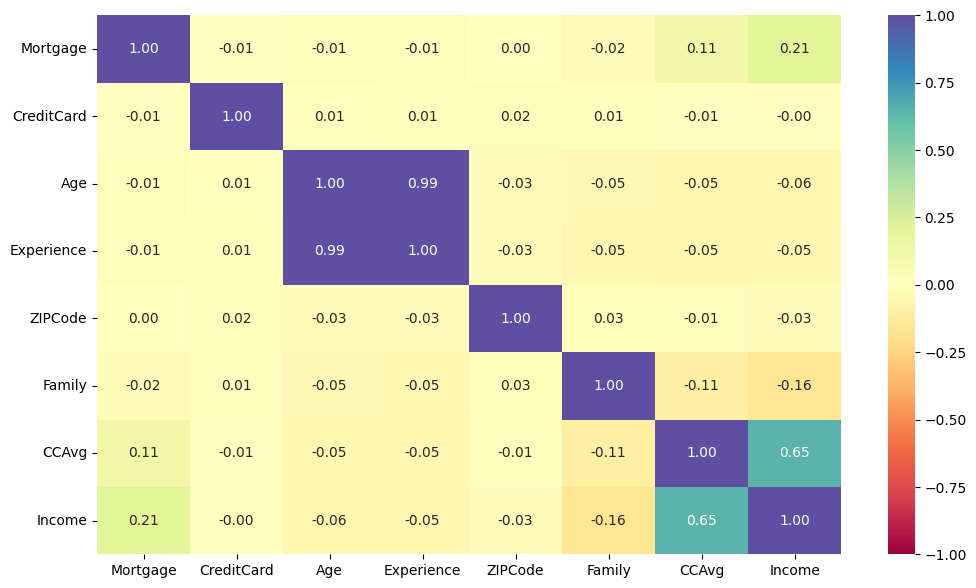

In [109]:
# defining the size of the plot
plt.figure(figsize=(12, 7))


# plotting the heatmap for correlation
sns.heatmap(
    data[num_features].corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);



* Age and Experience : **Very high correlation 0.99.** This indicates redundancy, since both variables provide almost identical information. To avoid multicollinearity, one of them typically should be dropped.

* Income and CCAvg  : Strong positive correlation 0.65. This makes sense, as customers with higher incomes tend to spend more on credit cards.

* Income and Mortgage : Moderate correlation 0.21. This suggests that some higher income customers are more likely to hold biger mortgages though the relationship is weaker compared to Income and CCAvg.




## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

Feature engineering:
* Age Column dropped due to redundancy with Experience. The two variables are almost perfectly correlated correlation  0.99, meaning they provide the same information. Keeping both would introduce multicollinearity without improving model performance.
* ZIP Column Code dropped because it adds no predictive value in this dataset. After testing grouped versions ZIP2 bins, no meaningful correlation with loan acceptance was found. Keeping it would only add noise and complexity without improving accuracy.

* Customer ID Column dropped because it is a unique identifier and does not reflect customer behavior or financial attributes. Including it could lead the model to memorize IDs, causing overfitting, rather than learning useful patterns.


In [110]:
data.drop(columns=['Age','AgeGroup','ID','ZIPCode'],inplace=True)


In [111]:
data.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIP2
0,1,49,4,1.6,1,0,0,1,0,0,0,91
1,19,34,3,1.5,1,0,0,1,0,0,0,90
2,15,11,1,1.0,1,0,0,0,0,0,0,94
3,9,100,1,2.7,2,0,0,0,0,0,0,94
4,8,45,4,1.0,2,0,0,0,0,0,1,91


In [112]:
#Need to begin my prprocessing state so need to drop my personal loan which I am assuming is my target y

y = data['Personal_Loan']
X = data.drop(columns=['Personal_Loan'])

In [113]:
#Going to train 80% of data and test only 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")

# counted how many times each class like 0 didnt take a loan or 1 took loan appears in my training set .
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
# counted how many times each class like 0 didnt take a loan or 1 took loan appears in my Test set . and normalize it to give me proportions .
#and multiply by 100 to get the results in percentages.
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 11)
Shape of test set: (1000, 11) 

Percentage of classes in training set:
Personal_Loan
0    90.625
1     9.375
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    89.5
1    10.5
Name: proportion, dtype: float64


## Model Building

In [115]:
# creating an instance of the decision tree model
dtree = DecisionTreeClassifier(random_state=42)

# fitting the model to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation Criterion

*


In [116]:
#predictions
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)


#accuracy
print("Train Accuracy:",accuracy_score(y_train, y_train_pred))
print("Test Accuracy:",accuracy_score(y_test, y_test_pred))




Train Accuracy: 1.0
Test Accuracy: 0.987


### Model Building

In [117]:
def model_performance_classification(model, predictors, target):
    """
    metrics to check classification model performance

    model: trained classifier
    predictors: X independent variables
    target: Y dependent variable TRUE LABELS
    """

    # Predictions
    pred = model.predict(predictors)

    # Metrics
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # results into dataframe
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

Model Building perlim explanation

1.  Training data


*   Accuracy is 100% This means the decsion tree memorized the training data perfectly well.
*   Every training example was classifed correctly


2.   Test Set


*   Accuracy is still very high at about 98.6%  of the test(unseen data) are classifed correctly
*   Recall is about 92% so like when it predicts  "yes, will accept loan" its correct 94% of the time
*   F1 93% Balance between the percesion and recall is strong .


The model might be overfitting on my training data but still doing a great job wwith the unseen data or test data .

my patterns in the data are clear not to noisy


In [118]:
def plot_confusion_matrix(model, predictors, target,class_names=["No Loan","Loan"]):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="",xticklabels=class_names, yticklabels=class_names)

    # Add a title to the plot
    plt.title("Confusion Matrix")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

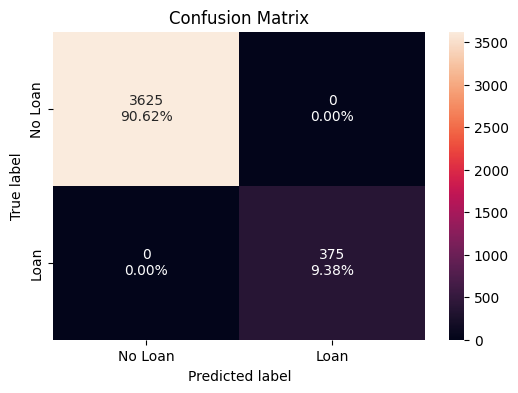

In [119]:
plot_confusion_matrix(dtree, X_train, y_train)


*  True Negative : Test data was about 3,625 records. These are actual no loan people and the model correctly predicted No loan about 90.6%.
90.6% of the all the test samples were True Negatives
*   True Postives : 375 actual loan takes in my test data and model correctly predicted all 375 as loan .





In [120]:
dtree_train_perf = model_performance_classification(
    dtree, X_train, y_train
)
dtree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


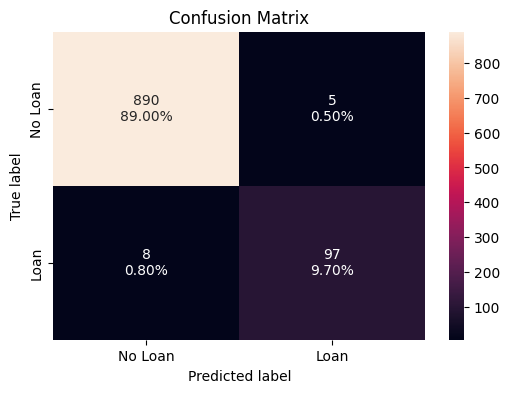

In [121]:
plot_confusion_matrix(dtree, X_test, y_test)

model performance classification

*  TN : Out of all the test cutomers , 890 were non loan customers that the model correctly classifed and the rate is 89% accruacy with the non loan group.


* Flase Postive: Out of all  test customers 8 customers were non loan customers correctly classifed at 80%

*   True Postive:  out of all the test customers , 6 were loan customers that modle correctly classifed as Loan . The rest are non loan


*  False Negative: about .80%  of the Non Loan customers 8 our of 899 were incorectly classifed as loan customers.




In [122]:
dtree1_test_perf = model_performance_classification(
    dtree, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.987,0.92381,0.95098,0.937198


Accuracy 98%
Out of all test customers, 98% were classified correctly.
Accuracy is high partly because most customers are “No Loan” majority class.

Recall 92.4%
Of all the actual loan customers, 92% were correctly identified.
the bank is catching most of the people who actually take a loan.

Precision 95%
Of all the customers the model predicted as “Loan,” 95% were truly loan takers.
This means very few false alarms.

F1 93.3%
A balanced metric that combines precision & recall.
Strong F1 shows your model is performing well on both fronts

Difference betwwen both is that F1 there is a difference so this means that the model can be overfitted.

#Decision Tree (sklearn default) Visualization

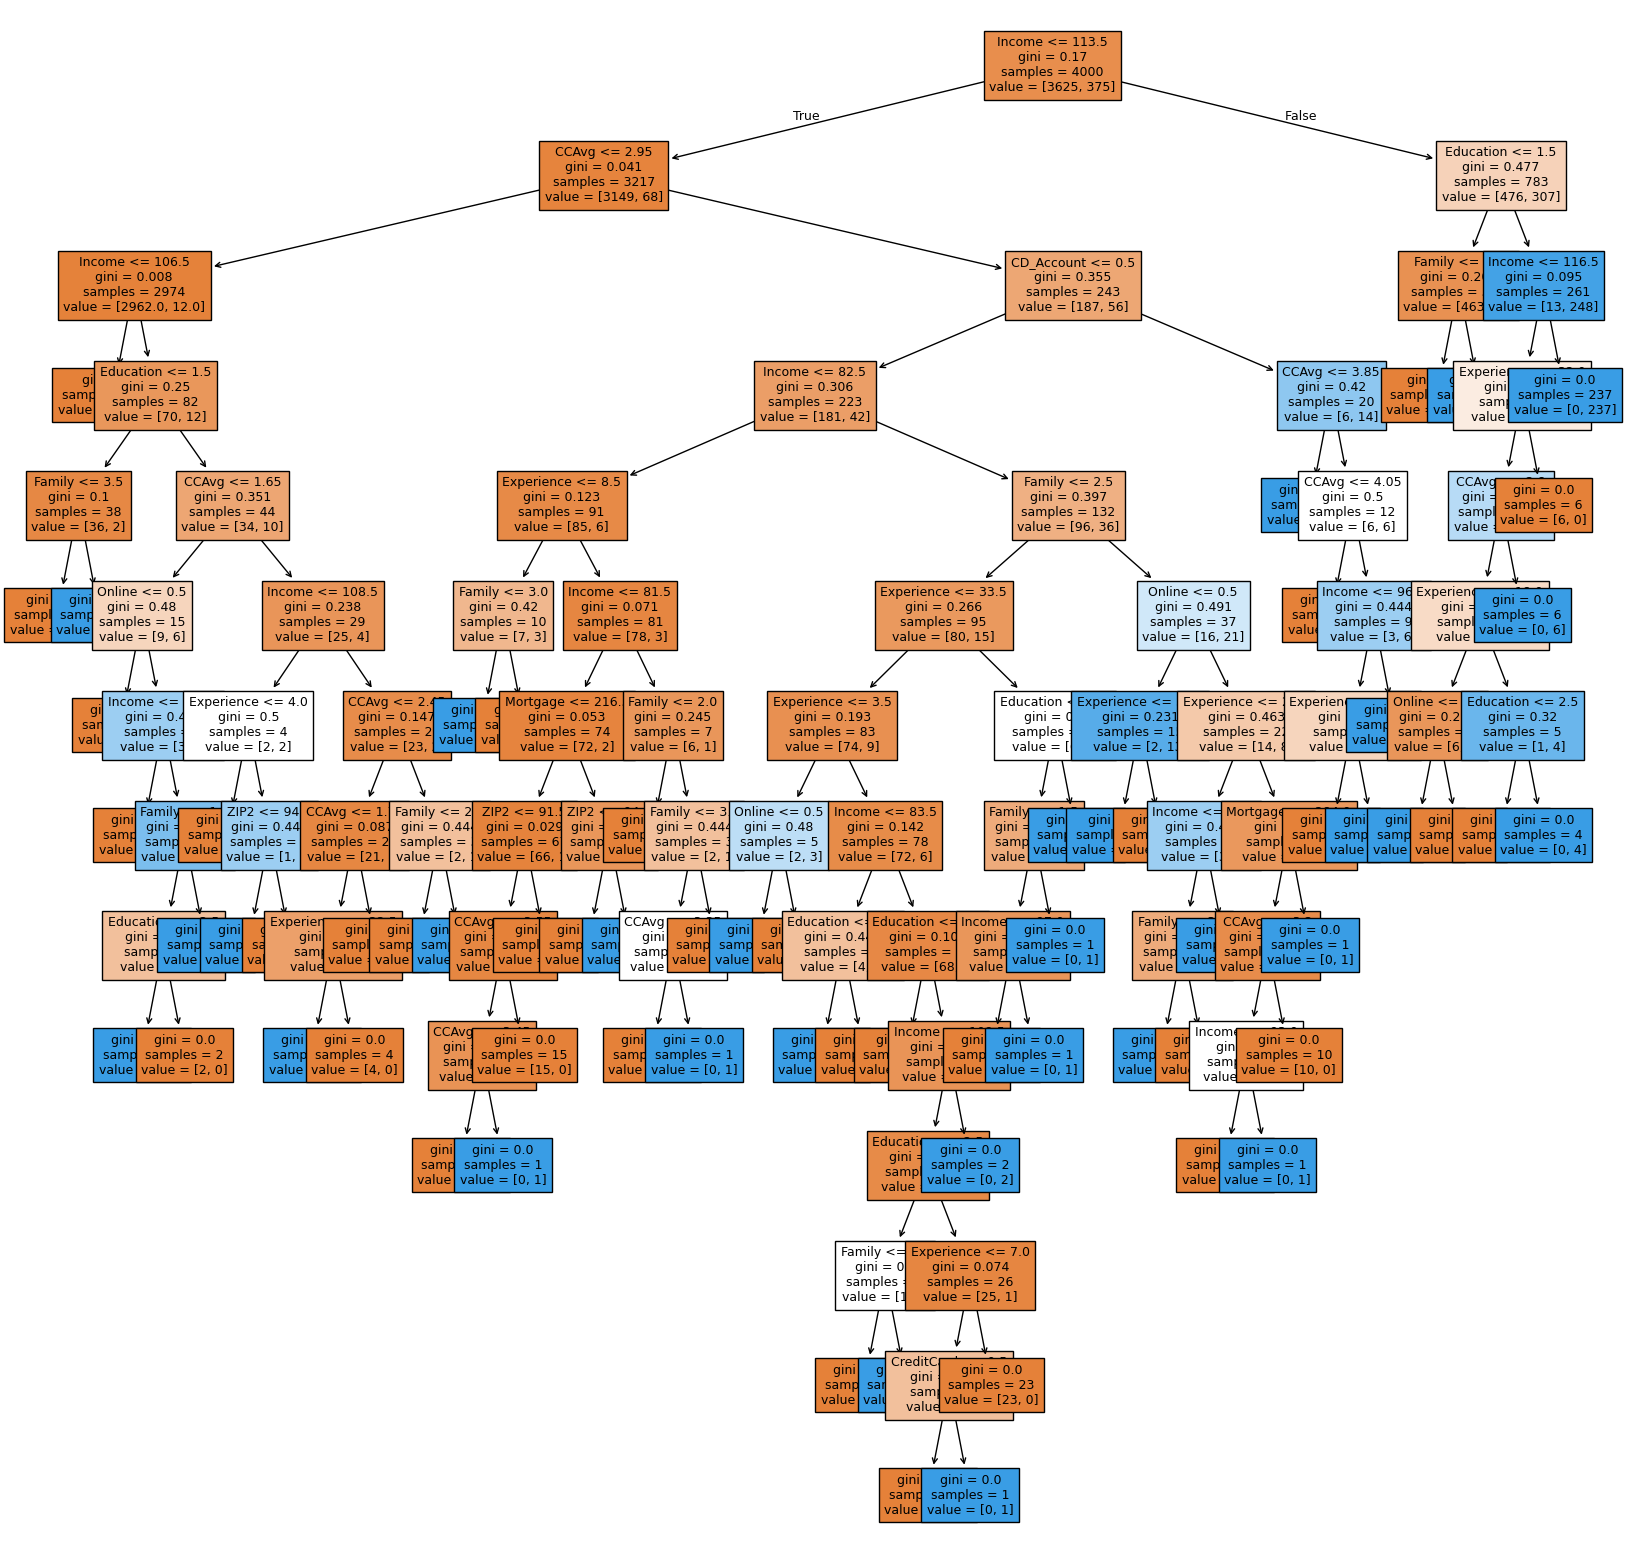

In [123]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

                      Income ≤ 106.5K

Gini  0.008 with 2,974 samples  almost all 2,962 non-loan, 12 loan are predicted as non-loan

Customers in this group are very unlikely to accept a loan

                    CCAvg Credit Card Spending

At one major split: Gini 0.041 with 3,217 samples 3,149 nonloan 68 loan.

Customers with low credit card spending generally decline loans higher spending increases the chance of acceptance

                      Income > 116.5K

Gini  0.095 with 261 samples  248 loan, 13 non-loan

Higher-income customers are much more likely to accept a loan

                      Education

Splits on education show higher impurity  Gini 0.47 meaning both loan and nonloan customers are mixed

Still higher education levels Graduate/Professional lean toward greater loan acceptance

Complex Tree with a lot of tree branches and leafs

In [124]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [36.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.65
|   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |--- Income <= 108.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  108.50
|   |   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   

## Model Performance Improvement

#Decision Tree (Pre-pruning)





In [125]:
# define the parameters of the tree to iterate over

#nstead of letting the tree grow fully and then cutting it back, pre-pruning stops the tree from growing too complex in the first place.
#You do this by setting growth limits when you create the tree:

#max_depth  maximum levels in the tree

#min_samples_split  minimum samples needed to split a node

#min_samples_leaf  minimum samples required at a leaf node

#max_leaf_nodes  maximum number of leaves allowed

#These constraints limit complexity up front, so you don’t have to prune as much later.
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [126]:
# creating an instance of the best model
dtree_pre = best_estimator

# fitting the best model to the training data
dtree_pre.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=np.int64(20),
                       min_samples_split=np.int64(20), random_state=42)

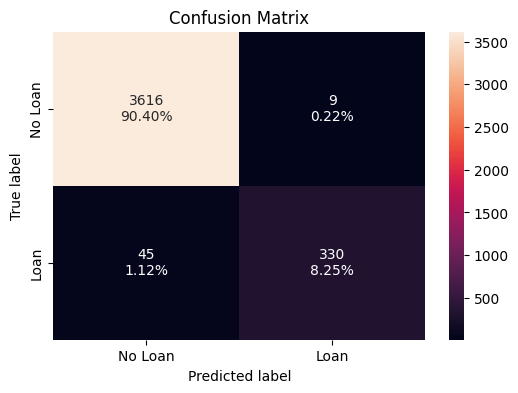

In [127]:
plot_confusion_matrix(dtree_pre, X_train, y_train)

True Negatives : 90.40 % Customers who did not take a loan and were correctly predicted as non-loan.

True Positives:8.3% Customers who took a loan and were correctly predicted as loan.

False Positives:0.22% Customers predicted as loan but actually non-loan.

False Negatives: 1.12% Customers predicted as non-loan but actually loan


the pre pruned model achievs high accruacy on traingn set with small misclassifactions.

In [128]:
dtree_pre_train_perf = model_performance_classification(
    dtree_pre, X_train, y_train
)
dtree_pre_train_perf

,Accuracy,Recall,Precision,F1
0,0.9865,0.88,0.973451,0.92437


Accuracy 98.65% : The model correctly classifies almost all customers in the training set.

Recall 88.0 Of all customers who actually took a loan, the model captures 88%. This means it misses about 12% false negatives.

Precision 97.35% When the model predicts a customer will take a loan, it is correct about 97% of the time, so there are very few false positives.

F1 Score 92.4% The harmonic mean of Precision and Recall, showing a good overall balance between the two.

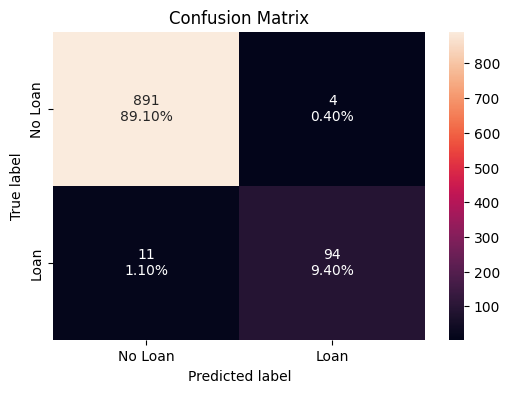

In [129]:
plot_confusion_matrix(dtree_pre, X_test, y_test)

Test Unseen data
True Negatives 89.9Customers who did not take a loan and were correctly predicted as non-loan.

True Positives 9.4% Customers who took a loan and were correctly predicted as loan.

False Positives 0.5% Customers predicted as loan but actually non-loan.

False Negatives 0.4%Customers predicted as non-loan but actually loan.



In [130]:
dtree_pre_test_perf = model_performance_classification(
    dtree_pre, X_test, y_test
)
dtree_pre_test_perf

,Accuracy,Recall,Precision,F1
0,0.985,0.895238,0.959184,0.926108


Accuracy 98.5% The model correctly predicts almost all customers in the test set.
Recall 89.5% Out of all actual loan customers about 89.5% were correctly identified. A small 10.5% were missed false negatives.

Precision 95.9% When the model predicts a customer will take a loan it is correct nearly 96% of the time. This shows very few false positives.

F1 Score 92.6 Balanced measure of precision and recall nearly identical to the training F1 score 92.4%.

he similar F1 scores between training 92.4% and test 92.6% indicate little to no overfitting.

The model generalizes well to unseen data  maintaining strong precision and recall. Overall the pre-pruned decision tree performs reliably in classifying both loan and non-loan customers.

visualizing the pre pruned tree

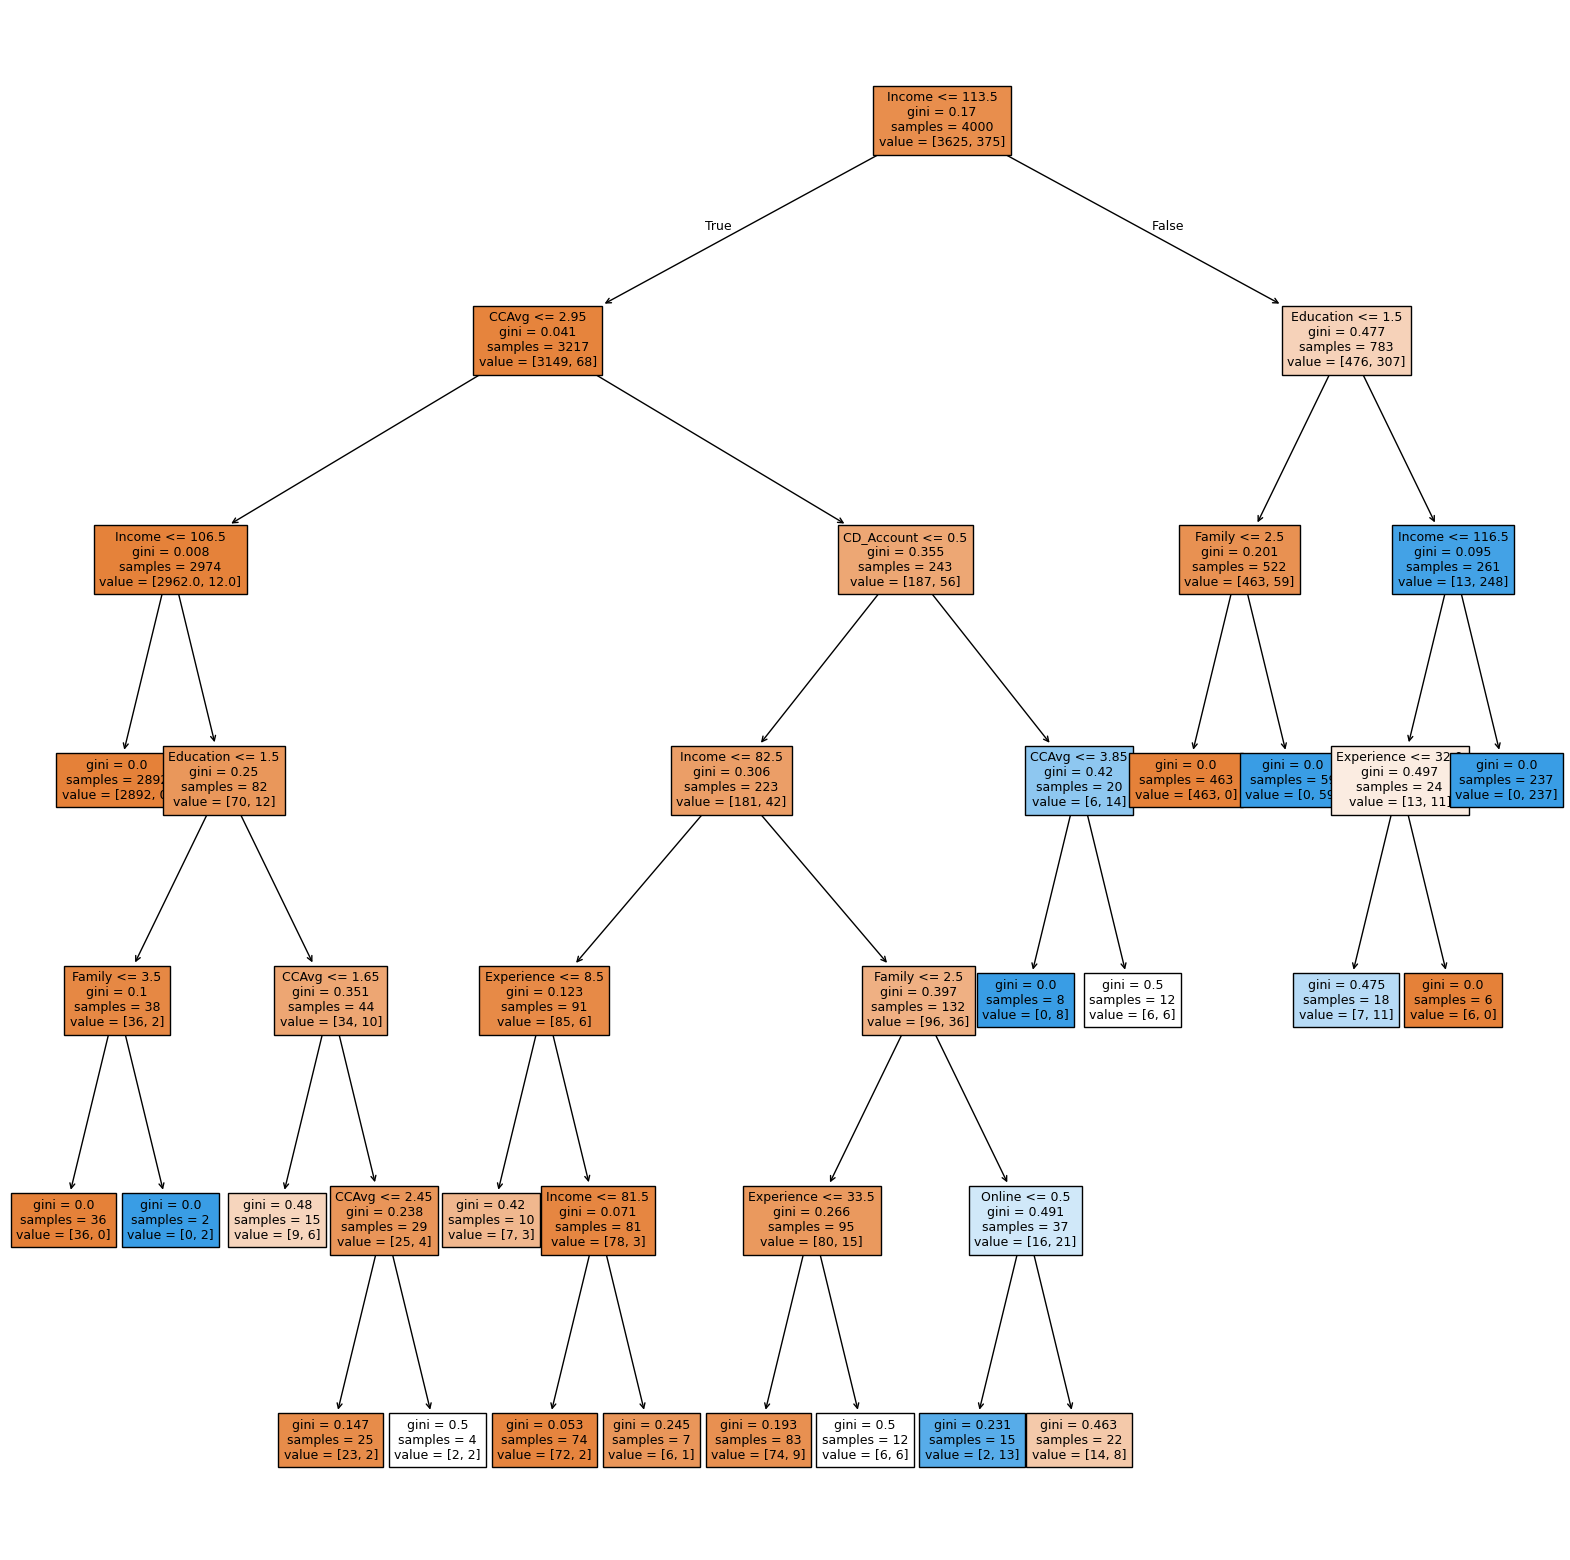

In [131]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree_pre,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

The Root Split is Income (expected from EDA)

Early Split  include CCAVG and Education

            CCAVG  (credit card average monthly spening )

One early split shows a gini impurity of 0.041, which is very low, meaning the node is almost pure. Out of 3,217 customers at this split, 3,149 were non-loan customers and only 68 were loan customers. This indicates that customers in this branch generallydo not accept loans unless their credit card spending is much higher

                        Education
Another early split has a gini impurity of 0.477, which is relatively high, meaning both loan and non-loan customers are present in significant numbers. This confirms what we saw in the EDA: higher education levels are associated with a greater likelihood of loan acceptance, so Education adds meaningful predictive value.

                          Income <=106
nearly pure node with gini = 0.008 and 2,974 samples. The vast majority are non-loan customers 2,962, with only 12 loan customers. This indicates that customers with incomes under 106K are very unlikely to take a loan.


                      Income  <=116.5
Another very pure node with gini = 0.095 and 261 samples. Here, 248 customers took a loan and only 13 did not. This clearly shows that higher-income customers (above ~116K) are much more likely to accept loan

In [132]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
       dtree_pre,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [36.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.65
|   |   |   |   |   |--- weights: [9.00, 6.00] class: 0
|   |   |   |   |--- CCAvg >  1.65
|   |   |   |   |   |--- CCAvg <= 2.45
|   |   |   |   |   |   |--- weights: [23.00, 2.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.45
|   |   |   |   |   |   |--- weights: [2.00, 2.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |--- Income <= 81.50

The decision tree confirms the insights from EDA:

Income is the dominant factor with clear thresholds that separate loan vs non-loan behavior.

CCAvg and Education also play important roles with higher spending and higher education levels linked to greater loan acceptance.

The pure nodes at income splits ≤ 106K = almost all non-loan116K+ almost all loan provide strong, business-actionable rules for targeting

#Decision Tree (Post-pruning)

In [133]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

Unlike my pre prunning we use the Complexity pruning or prune back ccp_apha to remove the weak splits.

In [134]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000143,0.000429
2,0.000164,0.000921
3,0.000174,0.001444
4,0.000229,0.001903
5,0.000230,0.002823
6,0.000232,0.003751
7,0.000250,0.004251
8,0.000304,0.004555
9,0.000333,0.005555


This is the prunning parameter . Larger alpha means strong prunning .


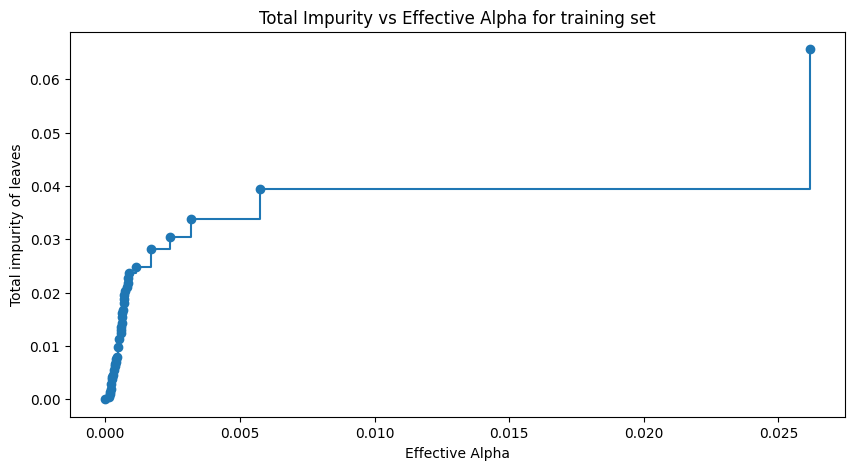

In [135]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");


*   As Alpha(ccp_alpha) increases the model is pruned more agressively so this means the impurity starts to inclease.
*   The model is loosing detail and accuracy on the training data .


*   While we always want a low impurity rate  we need to prevent overfitting so its okay because as we prune the tree combines leaves and present customers in a broader group .







In [136]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.05214930148943829


When ccp_alpha is = 0.0521 the tree has pruned just 1 node or the root.
The tree doesnt split at all
it predicats the same class for every customer the majority class the wins is No loan customers.

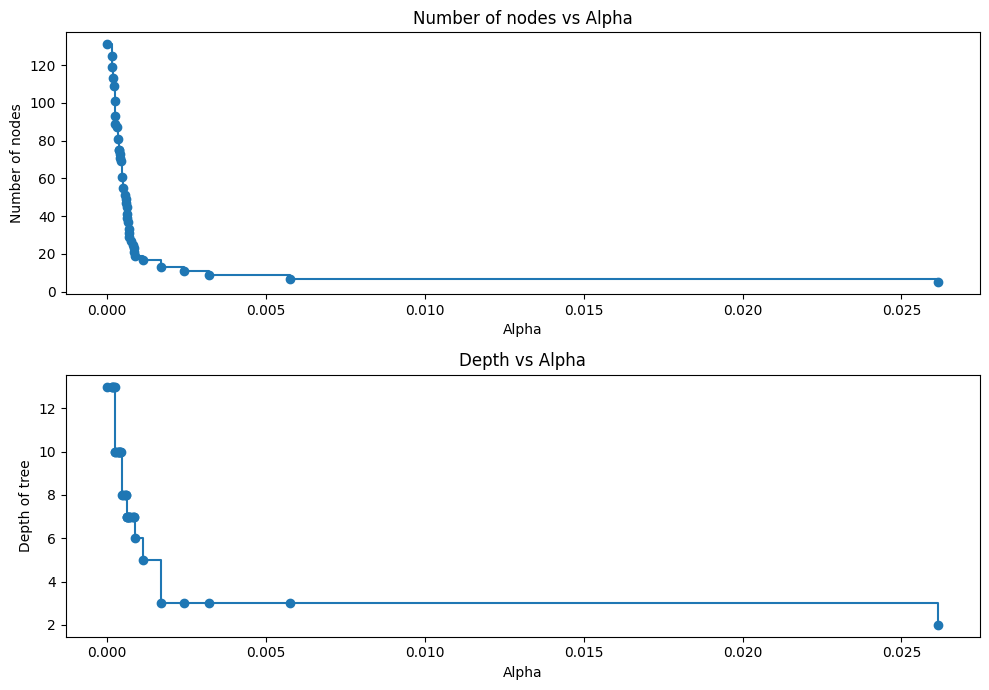

In [137]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

* The range of 0.000 to 0.005 Reduces the tree to fewwer than 20 nodes, while an alpha in the range of 0.000 to 0.001 keeps the deph around 4.

* This balance creates a simpler , more interpretable tree without loosing predictive power.

In [139]:
train_Post_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_Post_scores list
    train_Post_scores.append(f1_train)

In [140]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


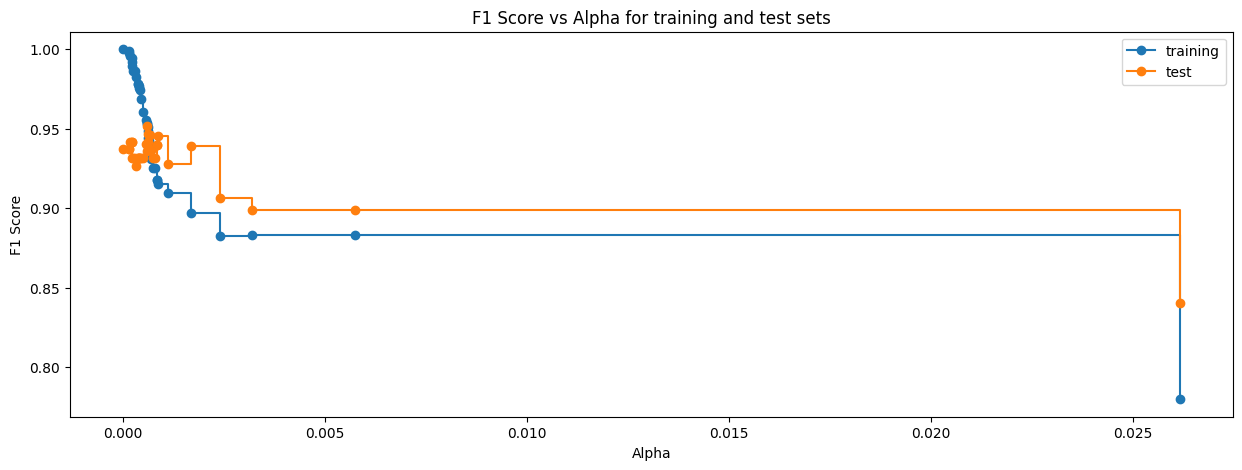

In [141]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_Post_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

1. Train F1 Score
 * starts really high close to 1 but alpha is very small .
 * as alpha increases because of prunning it strarts to reduces the F1 or how well the tree fits the training data.

 2. Test F1
 * As Alpha increases F1 decreases
 * impoves as Alpha increases slighly tree peaks  then declines again when it became simple.

 The test of F1 score first increases and then decreses forming a peak at the optimal alpha this indicates the sweet spot where the tree is pruned enough to aviod overfitting.

Alpha in test peak at around 0.004 and f1 at about 0.953

In [142]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree_highsF1_score = clfs[index_best_model]
print(dtree_highsF1_score)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0006000000000000003),
                       random_state=42)


HIGH F1 / POST PRUN TREE EVAL

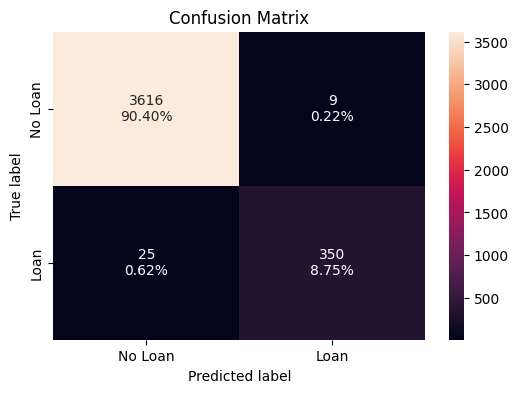

In [143]:
plot_confusion_matrix(dtree_highsF1_score, X_train, y_train)

* TN: 3616 OR 90.40% nearly all of non loan customer correctly classifed
* FN: about 25  OR .62% of loan customers were missed
* FP: 350 most loan customers were correctly classifed .
* FP : about 9 or .22% customers few misclassifed as loa but ewere no loan customers.

In [144]:
dtree_post_train_perf = model_performance_classification(
    dtree_highsF1_score, X_train, y_train
)
dtree_post_train_perf

,Accuracy,Recall,Precision,F1
0,0.9915,0.933333,0.97493,0.953678


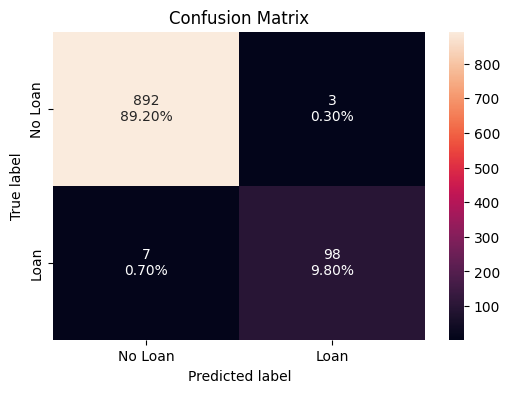

In [145]:
plot_confusion_matrix(dtree_highsF1_score, X_test, y_test)

* TN: Also nealy all 892 or 89.20% of customers were correctly classifed as No Loan
* FP : about 3 or .30% of customers were label las loan but were No loan customers.

* FN: about 7 or .70% of loan customers were predicted or miss classifed as No LOAN.

* TP: About 98 loan custmers were correctly predicted as loan customers.

In [146]:
dtree_post_test_perf = model_performance_classification(
    dtree_highsF1_score, X_test, y_test
)
dtree_post_test_perf

,Accuracy,Recall,Precision,F1
0,0.99,0.933333,0.970297,0.951456


* Test F1 vs Training F1 Test is slightly higher suggest that there is  post overfitted.
* Accuracy is very high and staied consistent
* Recall staied the same
* Perceision decreased a tiny bit .

Visualizing the tree post prunned tree



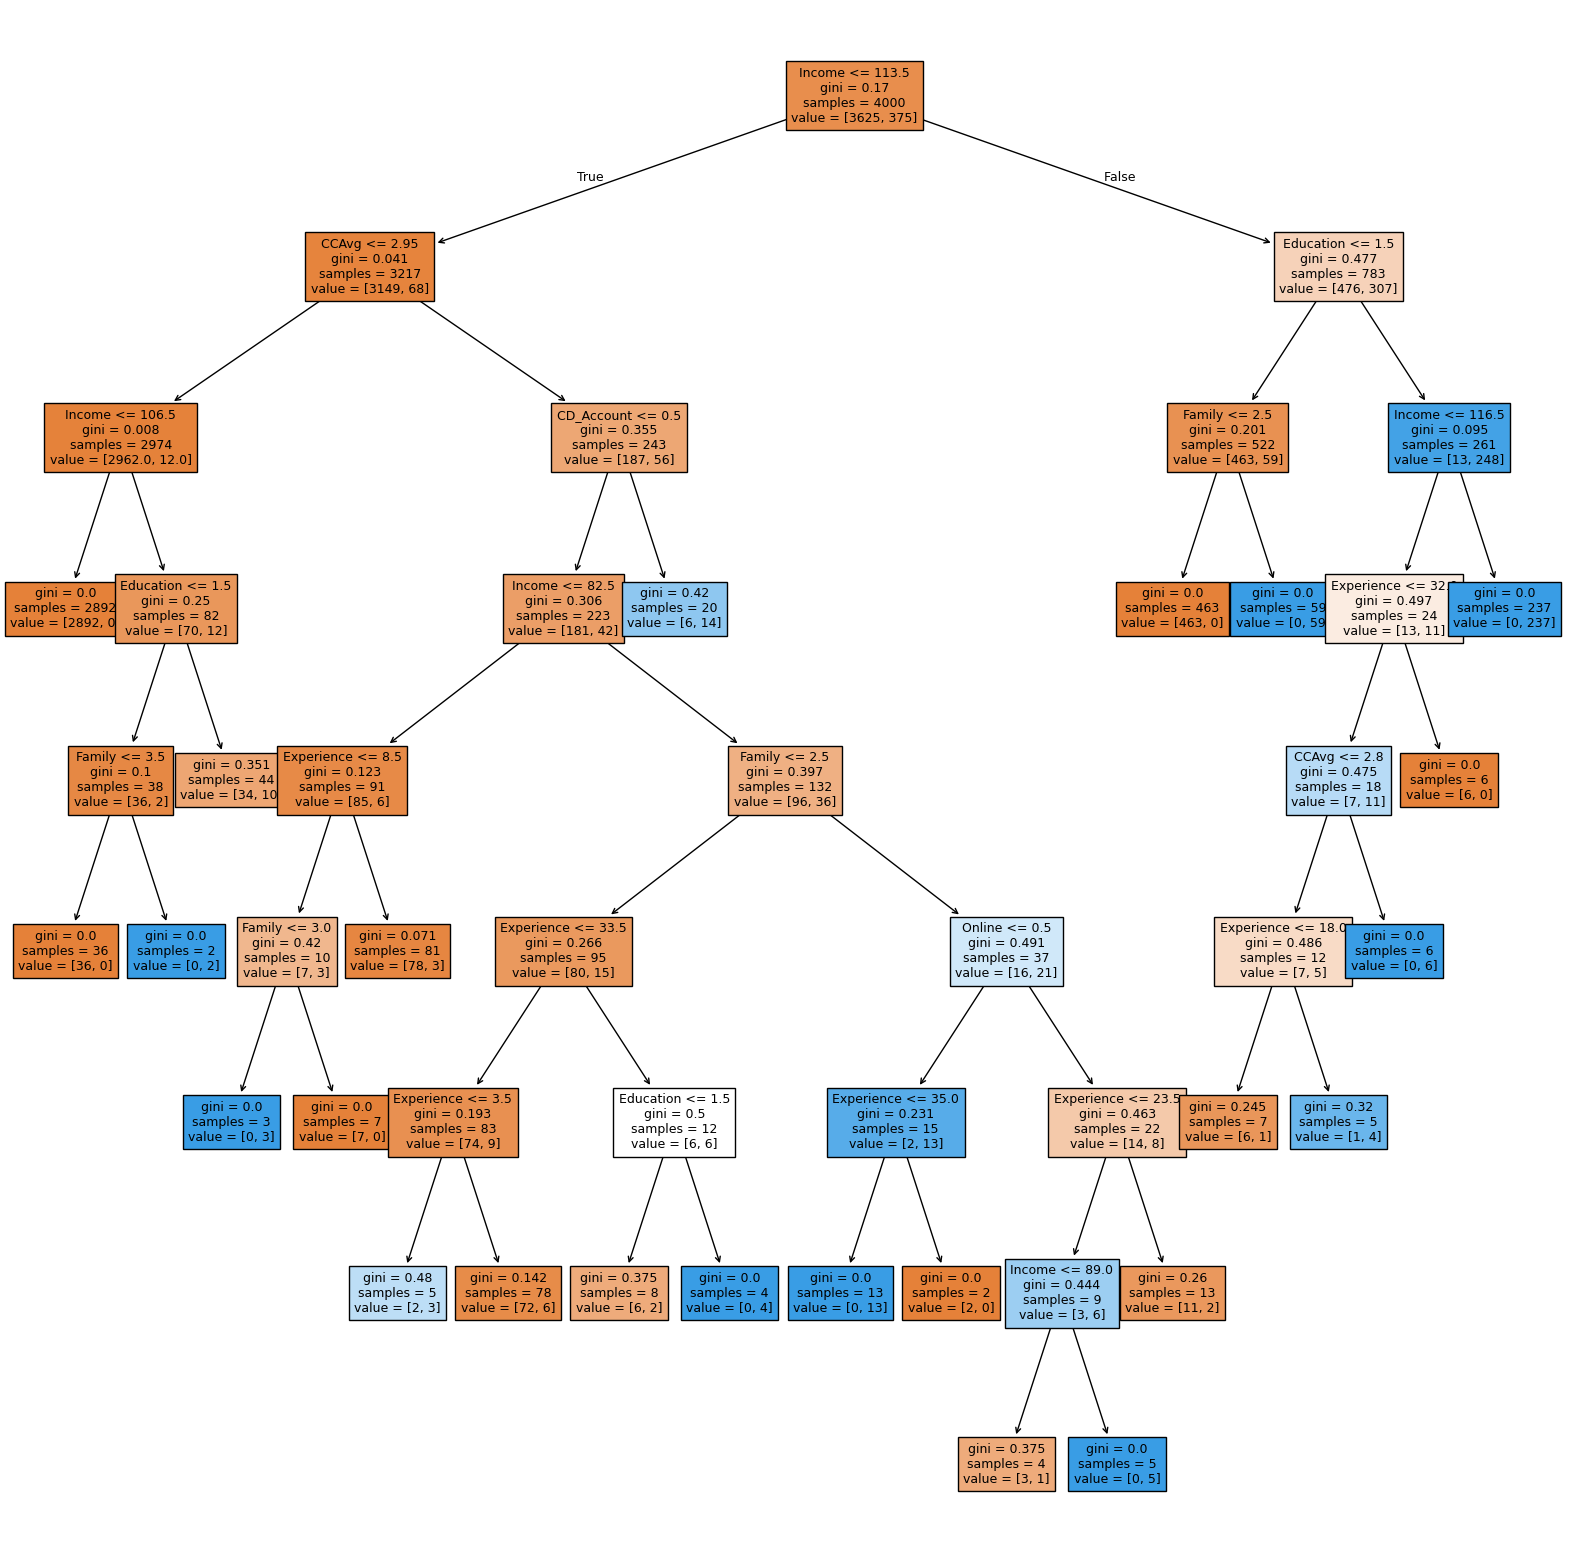

In [147]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree_highsF1_score,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

                  Dominant Splits

 CCAvg, Income, and Education
Just like in the pre-pruned tree, the most influential features remain Credit Card Spending CCAvg Income, and Education. These attributes consistently separate loan vs non-loan customers

              CCAvg Credit Card Spending
One of the top splits is on CCAvg, with a very pure node (gini = 0.041) and 3217 samples. Out of these, 3,149 are non-loan customers and only 68 are loan customers. This indicates that customers in this branch rarely accept loans unless their credit card spending is significantly higher.

                  Income <= 106.5K
The tree also includes a strong split on Income, with gini = 0.008 and 2,974 samples. At this node, almost all customers are non-loan 2,962 with just 12 loan customers. This confirms that lower-income customers are very unlikely to accept a loan.

                          Education
Education still appears as a meaningful split, separating customers with higher loan acceptance rates graduates and professionals from those less likely to take loans ndergraduates. While its nodes are not as pure as Income or CCAvg, it helps refine segments where financial behavior is less clear-cu

The post-pruned tree confirms the same dominant predictors as the pre-pruned tree Income, CCAvg, and Education but with a simpler structure that avoids overfitting. The Income ≤ 106.5K branch is almost entirely non-loan, while higher CCAvg and Education levels continue to signal greater likelihood of loan acceptance.


In [148]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree_highsF1_score,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2892.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [36.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [34.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |--- Family <= 3.00
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |--- Family >  3.00
|   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |--- weights: [78.00, 3.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- Experience <= 33

## Model Performance Comparison and Final Model Selection

In [149]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_pre_train_perf.T,
        dtree_post_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.986500,0.991500
Recall,1.0,0.880000,0.933333
Precision,1.0,0.973451,0.974930
F1,1.0,0.924370,0.953678


* Sklearn tree: shows perfect 1 on training set this means there is clear overfitting because the model memorized all the data

                        Pre-Pruned
* Accruacy drops compared to Post Prunning but its still strong.
* Recall  decreases really bad compared to post prunning from 0.88 to 0.93 thats about 0.053.
* Precision stays high at 0.97 when it predicts a loan its almost correct
* F1 FALLS to 0.92 . Thats almost a 0.02 weaker than default and Post prunning.
* Pre prunning reduced the overfitting but cost of missing more true loan customers.


                      Post-Pruned

* Accruacy improves to.99 better at cathing loan customers than pre prunned .
* precsion remain really good at .97 very few false alarms
* f1 is the highest amoung the pre pruned and models at 0.954. best balance of precsion and recal.


Post prunning shows the best balance

In [150]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree_pre_test_perf.T,
        dtree_post_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.987000,0.985000,0.990000
Recall,0.923810,0.895238,0.933333
Precision,0.950980,0.959184,0.970297
F1,0.937198,0.926108,0.951456


Skit Tree: Performance looks strong at the test set but recall is slighly lowers than training .
                                      Pre Pruned
* Accruacy : Slighly drops to 0.985
* Recall decreases : to 0.895 meaning more loan custmers are missed compared to default tree
* percision : impoves to 0.959 wpredicts yes loan more often correct .
* f1: 0.92 LOWEST amoung the three . pre prunning model more conservative at reducitng false postives but sill get more true loan customers that are missed.


                                        Post- Prunned
* Accruacy improves and is the highest amoungst the three
* recall also increses to .933 which means that catches more loan than default and pre pruned
* precsion is the best of all also at .97
* f1 increses  highest overall


                                  

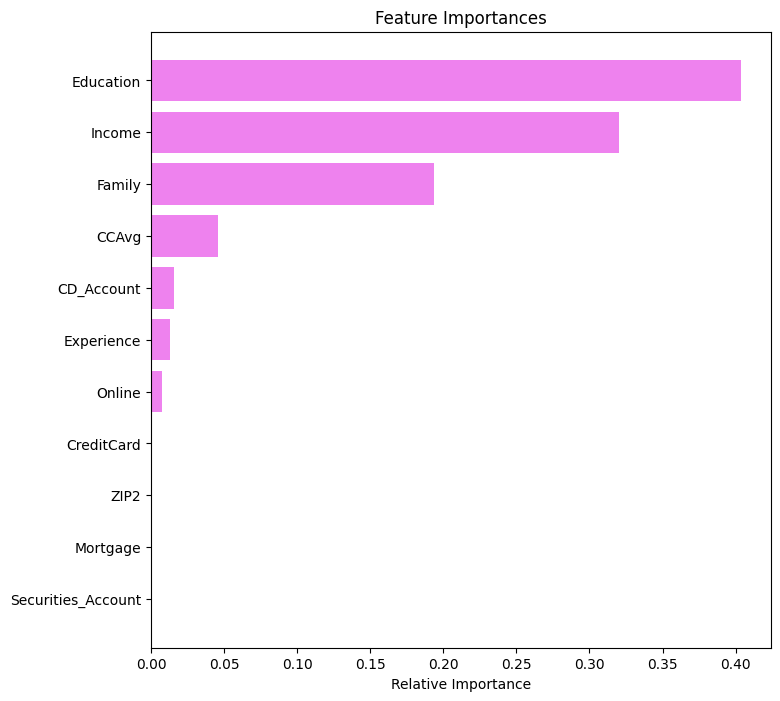

In [151]:
# importance of features in the tree building
importances = dtree_pre.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most influential attributes were Income, CCAvg and education . Which aligns with correlation analysis from before. Attributes like online banking usuage and securities had almost no influence for predictions.

In [152]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction = dtree_pre.predict(applicant_details)

print(approval_prediction)

[0]
CPU times: user 2.49 ms, sys: 0 ns, total: 2.49 ms
Wall time: 2.44 ms


In [153]:
# making a prediction
approval_likelihood = dtree_pre.predict_proba(applicant_details)

print(approval_likelihood[0, 1])

0.0


In the pre prunned tree there is a 0.0 is the probablity of the class 1 loan . So no chance in getting accpeted a perfonal loan.
based on the atributes .
This decsion tree considers this customer certain to no accept a loan .

In [154]:
# prediction with post-pruned model
approval_likelihood_post = dtree_highsF1_score.predict_proba(applicant_details)

print("Pre-pruned model loan likelihood:", approval_likelihood[0, 1])
print("Post-pruned model loan likelihood:", approval_likelihood_post[0, 1])


Pre-pruned model loan likelihood: 0.0
Post-pruned model loan likelihood: 0.0


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

                            Recommendation
* Target high-income customers >106.6K

* Focus marketing campaigns on higher-income groups, as they form the majority of loan takers.

* Provide personalized loan offers to maximize conversions.

* Customers with higher monthly card spending should receive priority offers.
* use credit card usage as an indicator

* Segment your customers by education for precision

* Target Graduate/Advanced degree holders.

* Dont spend time on  campaigns for Undergraduates to avoid wasted spend.

* Avoid spending resources on customers with Income ≤ 106.6K and low CCAvg  these are almost guaranteed non loan customers.

* Focus budget on loan-dominant leaves identified in the post-pruned tree.


* focusing on the 95% loan prone segments Income high, Education advanced, high CCAvg, the bank can maximize ROI on marketing campaigns.


              I would choose the post prunned tree
* because Income is the strongest driver with customers above the 106 AND 99% are non loan customers.
customers with 106 and above loan acceptence rises significantly

* CCAVG or cred card spending is highly predictive
customers with low monly credit card spending are mostly non loan customers
higher spending increases proablity of loan acceptance
card usage behavior is strong because willingenss to borow

* Education
customers with graduate and advance degresees show higher likelihood of loan acceptance
undergraduates sker more towards no loan